no display found. Using non-interactive Agg backend


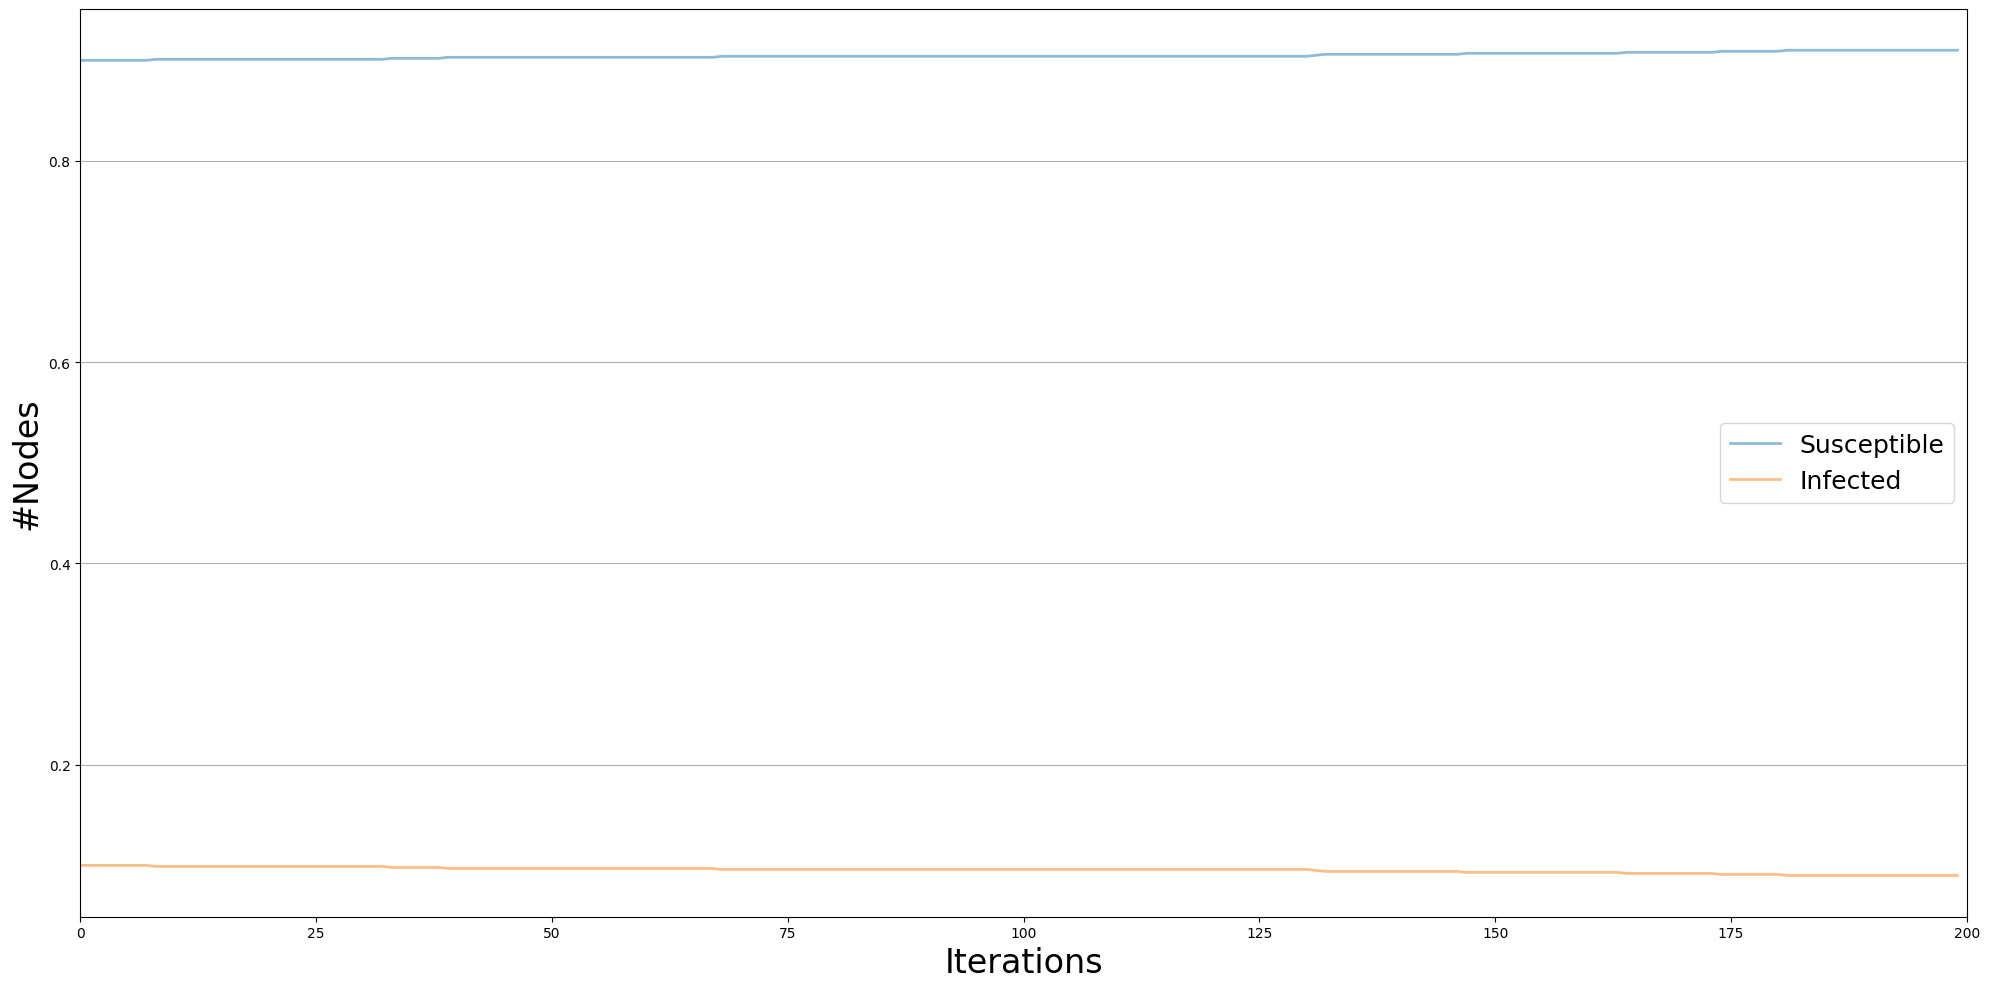

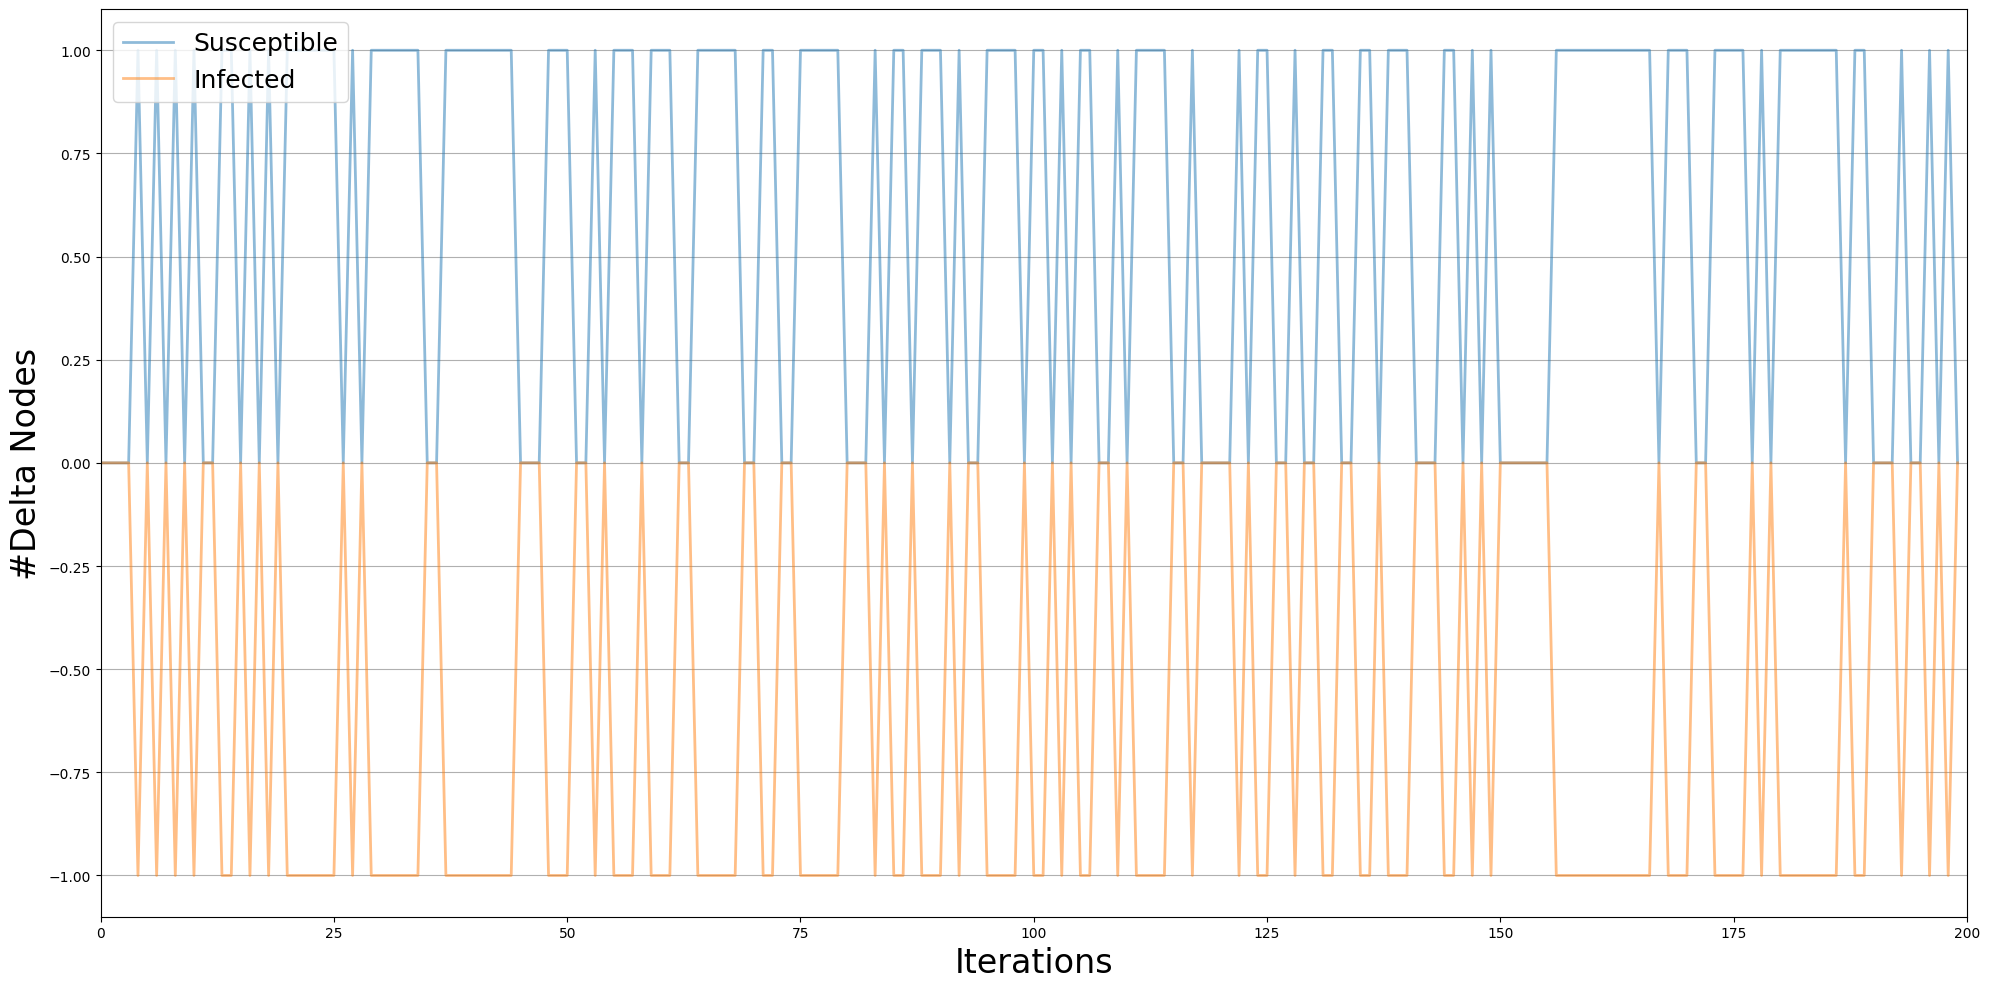

In [2]:
'''
The Q-Voter model was introduced as a generalisation of discrete opinion dynamics models [1].

Here, N individuals hold an opinion ±1. At each time step, a set of q neighbours are chosen and, if they agree, they influence one neighbour chosen at random, i.e. this agent copies the opinion of the group. If the group does not agree, the agent flips its opinion with probability ε.

It is clear that the voter and Sznajd models are special cases of this more recent model (q = 1,ε = 0 and q = 2,ε = 0).

Analytic results for q ≤ 3 validate the numerical results obtained for the special case models, with transitions from a ordered phase (small ε) to a disordered one (large ε). For q > 3, a new type of transition between the two phases appears, which consist of passing through an intermediate regime where the final state depends on the initial condition. We implemented in NDlib the model with ε = 0.

Statuses:
- 0: Susceptible
- 1: Infected

Parameters:
- q: number of neighbours to interact with

Intial Parameters:
- Infected fraction


- Selezione dell'opinione: Il modello Voter considera tutti i vicini, mentre il Q-Voter considera solo un campione casuale di dimensione q.
- Soglia di influenza: Il Voter cambia idea solo se è in minoranza rispetto a tutti i vicini. Il Q-Voter cambia idea se è in minoranza rispetto alla maggioranza del campione q.
- Comportamento con pareggi: Entrambi i modelli prevedono un aggiornamento casuale dell'opinione in caso di pareggio tra le opinioni vicine.

'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = op.QVoterModel(g)
config = mc.Configuration()
config.add_model_parameter("q", 5)
config.add_model_parameter('fraction_infected', 0.1)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()